![title](imagens/M05-Pandas.jpg)

# Pandas - Noções básicas do pacote Pandas - Parte 3

# DataFrames

Os DataFrames representam o elemento fundamental dos Pandas e são diretamente influenciados pela linguagem de programação R, famosa por suas capacidades de análise de dados. Imagine um DataFrame como um conjunto organizado de séries, todas elas compartilhando o mesmo índice. Essencialmente, é uma estrutura tabular bidimensional, onde os dados são organizados em linhas e colunas, proporcionando uma maneira poderosa e flexível de lidar com conjuntos de dados complexos.

Com o Pandas, podemos manipular e analisar esses conjuntos de dados de maneira eficiente, aproveitando a riqueza de funcionalidades oferecidas por essa biblioteca. Desde operações simples de filtragem e seleção até transformações mais complexas e análises estatísticas, os DataFrames são a espinha dorsal de muitas tarefas de ciência de dados e análise exploratória.

Portanto, ao explorar esse tópico com o Pandas, estamos mergulhando no cerne da manipulação e análise de dados, aproveitando uma ferramenta poderosa que nos permite extrair insights valiosos e tomar decisões informadas com base nos dados disponív

### 3.1 O que são DataFrames?

Os DataFrames são estruturas de dados bidimensionais no Pandas.
Eles são semelhantes a tabelas de banco de dados ou planilhas do Excel.
Cada coluna em um DataFrame é uma série.

### 3.2 Características dos DataFrames:

- Bidimensional:  Possui linhas e colunas. Pode ser visto como uma coleção de séries.

- Flexibilidade de Dados:  Pode conter diferentes tipos de dados em cada coluna.eis.

### 3.3 Criando DataFrames

A partir de Arquivos CSV ou Excel
```
df = pd.read_csv('dados.csv')
df = pd.read_excel('dados.xls')
`````

A partir de Dicionários

In [1]:
# Importando o pacote Pandas
import pandas as pd

# Evitando mensagens de Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Criando um dicionário
data = {'Nome': ['Alice', 'Bob', 'Carol'],
        'Idade': [25, 30, 22]}

In [3]:
# Converte um dicionário para um DataFrame
df = pd.DataFrame(data)

In [4]:
# Visualizar as 5  primeiras linhas do DataFrame criado
df.head()

,Nome,Idade
0,Alice,25
1,Bob,30
2,Carol,22


In [5]:
#Verificando o tipo de dados do objeto df
type(df)

pandas.core.frame.DataFrame

In [6]:
# Reorganizando as colunas do DataFrame
pd.DataFrame(data, columns = ['Idade', 'Nome'])

,Idade,Nome
0,25,Alice
1,30,Bob
2,22,Carol


In [7]:
#Criando um outro dataframe, com os mesmos dados anteriores, acrescentando uma coluna e mudando o índice.
df2 = pd.DataFrame(data,
                columns = ['Nome', 'Idade', 'Escolaridade'],
                index = ['1', '2', '3'])

In [8]:
df2

,Nome,Idade,Escolaridade
1,Alice,25,NaN
2,Bob,30,NaN
3,Carol,22,NaN


In [9]:
# Mostrar os valores do DataFrame
df2.values

array([['Alice', 25, nan],
       ['Bob', 30, nan],
       ['Carol', 22, nan]], dtype=object)

In [10]:
# Mostrar os tipos de dados do DataFrame
df2.dtypes

Nome            object
Idade            int64
Escolaridade    object
dtype: object

In [11]:
# Mostrando as estatísticas do Dataframe (apenas dos valores numéricos)
df2.describe()

,Idade
count,3.000000
mean,25.666667
std,4.041452
min,22.000000
25%,23.500000
50%,25.000000
75%,27.500000
max,30.000000


In [12]:
# Mostrando as estatísticas do Dataframe (dos outros tipos de dados... Object)
df2.describe(include=['O'])

,Nome,Escolaridade
count,3,0
unique,3,0
top,Alice,NaN
freq,1,NaN


In [13]:
# Mostrar as colunas do DataFrame
df2.columns

Index(['Nome', 'Idade', 'Escolaridade'], dtype='object')

In [14]:
# Mostrando apenas uma coluna específica do DataFrame (cuidade: a linguagem Python é case sensitive)
df2['Nome']

1    Alice
2      Bob
3    Carol
Name: Nome, dtype: object

In [15]:
# Se quiser mostrar mais de uma coluna, terá que passar os nomes das colunas dentro de uma lista.
# Por exemplo... vamos mostrar as colunas: Cidade e Ano
df2[ ['Nome', 'Idade']]

,Nome,Idade
1,Alice,25
2,Bob,30
3,Carol,22


In [16]:
# Para exibir os índices...
df2.index

Index(['1', '2', '3'], dtype='object')

In [17]:
#Filtrando os dados pelo índice
df2.filter(items = ['pessoa2'], axis=0)

,Nome,Idade,Escolaridade


### 3.4 Operações com Dataframes

Filtragem de Dados

In [18]:
filtro = df['Idade'] > 25
df_filtrado = df[filtro]
print(df_filtrado)

  Nome  Idade
1  Bob     30


Ordenação de Dados

In [19]:
df_ordenado = df.sort_values(by='Idade', ascending=False)
print(df_ordenado)

    Nome  Idade
1    Bob     30
0  Alice     25
2  Carol     22


Slicing (Fatiamento) do Dataframe:

In [20]:
# Mostrando todo o dataFrame
df2

,Nome,Idade,Escolaridade
1,Alice,25,NaN
2,Bob,30,NaN
3,Carol,22,NaN


In [21]:
# Fatiando todas as linhas do índice pessoa1 até pessoa2
#Atenção: veja que o segundo parâmetro do slice não é exclusivo... ele é incluso no retorno.

df2['pessoa1':'pessoa2']

,Nome,Idade,Escolaridade


### 3.5 Manipulação de Dados

Adição de Colunas

In [22]:
df2['Sexo'] = ['F', 'M', 'F']
df2['Profissão'] = ['Médica', 'Advogado', 'Dentista']
df2

,Nome,Idade,Escolaridade,Sexo,Profissão
1,Alice,25,NaN,F,Médica
2,Bob,30,NaN,M,Advogado
3,Carol,22,NaN,F,Dentista


Remoção de Colunas

In [23]:
df2.drop(columns=['Profissão'], inplace=True)
df2

,Nome,Idade,Escolaridade,Sexo
1,Alice,25,NaN,F
2,Bob,30,NaN,M
3,Carol,22,NaN,F


### 3.6 Tratamento de Valores Ausentes

Identificação de Valores Nulos

In [24]:
df2.isnull()

,Nome,Idade,Escolaridade,Sexo
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False


Preenchimento de Valores Ausentes

In [25]:
df2.fillna(0, inplace=True)

MENSAGEM DE AVISO:

A mensagem de aviso aparece porque você está usando o método fillna() com inplace=True em uma DataFrame que contém arrays de tipo de dados dtype de objeto. O aviso sugere que o método fillna() pode estar causando rebaixamento de tipo de dados (downcasting), que será descontinuado em uma versão futura do pandas.

Para evitar esse aviso, você pode fazer uma das seguintes opções:

**Chamar o método infer_objects() antes de fillna():**

Antes de usar fillna(), chame df2.infer_objects() para inferir os tipos de dados apropriados para os elementos no DataFrame:

```
df2 = df2.infer_objects(copy=False)
df2.fillna(0, inplace=True)
```

**Alterar a opção pd.set_option():**

Você pode optar pelo comportamento futuro, desativando o rebaixamento silencioso. Defina a opção future.no_silent_downcasting como True:

```
pd.set_option('future.no_silent_downcasting', True)
df2.fillna(0, inplace=True)
```

In [26]:
df2

,Nome,Idade,Escolaridade,Sexo
1,Alice,25,0,F
2,Bob,30,0,M
3,Carol,22,0,F


Podemos também utilizar o NUMPY para inserir valores no dataframe...

In [27]:
import numpy as np

In [28]:
# Vamos inserir uma nova coluna no dataframe df2 com valores NaN

In [29]:
df2['Renda'] = pd.Series([np.nan] * len(df2))
df2

,Nome,Idade,Escolaridade,Sexo,Renda
1,Alice,25,0,F,NaN
2,Bob,30,0,M,NaN
3,Carol,22,0,F,NaN


In [30]:
#  Usando o NumPy para alimentar uma das colunas do dataFrame
## o método "arange" e cria um array de valores que crescem sequencialmente a partir de 0 até 2. 
## O argumento 3. especifica o valor final, 3 (borda exclusiva), mas o ponto decimal é importante aqui para garantir que seja tratado como um número 
## float em vez de um inteiro. Isso significa que o array resultante terá os valores [0.0, 1.0, 2.0].

df2['Renda'] = np.arange(3.)

In [31]:
df2

,Nome,Idade,Escolaridade,Sexo,Renda
1,Alice,25,0,F,0.0
2,Bob,30,0,M,1.0
3,Carol,22,0,F,2.0


In [32]:
#Resumo estatístico (valores numéricos)
df2.describe()

,Idade,Escolaridade,Renda
count,3.000000,3.0,3.0
mean,25.666667,0.0,1.0
std,4.041452,0.0,1.0
min,22.000000,0.0,0.0
25%,23.500000,0.0,0.5
50%,25.000000,0.0,1.0
75%,27.500000,0.0,1.5
max,30.000000,0.0,2.0


In [33]:
#Resumo estatístico (dos outros tipos de dados... Object)
df2.describe(include=['O'])

,Nome,Sexo
count,3,3
unique,3,2
top,Alice,F
freq,1,2


### 3.7 Visualização de Dados com Dataframes

Gráficos de Barras, Linhas e Pizzas

<Axes: xlabel='Nome'>

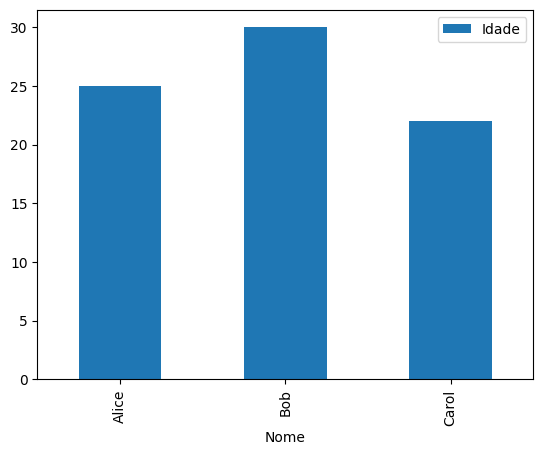

In [34]:
df.plot(x='Nome', y='Idade', kind='bar')

<Axes: xlabel='Nome'>

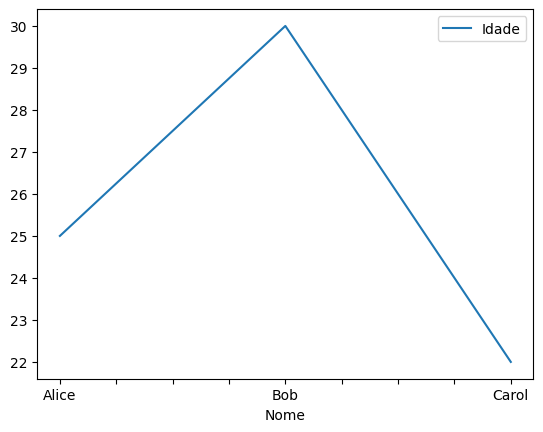

In [35]:
df.plot(x='Nome', y='Idade', kind='line')

<Axes: ylabel='Idade'>

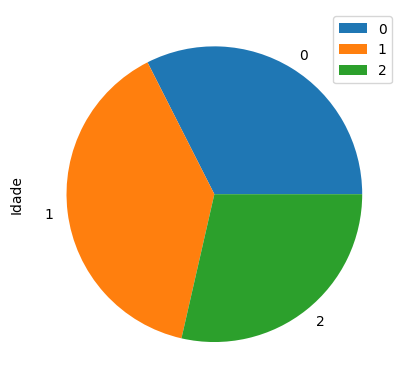

In [36]:
df.plot(x='Nome', y='Idade', kind='pie')


# FIM